#**2. Data Wrangling - II**#

In [ ]:
import pandas as pd

In [ ]:
csvfile = "/content/Academic_Performance.csv"

In [ ]:
#Loading the DataFrame into 'data' variable
data = pd.read_csv(csvfile, encoding='latin-1')

In [ ]:
display(data)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


###**Task - 1: Handling the Missing Values or Inconsistencies**###

In [ ]:
#Displaying the Null Values in the DataFrame
display(data.isnull())

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
477,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
display(data.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
#Technique-1: Fill Null Values(Nationality) with 'Indian' as the default value
data.fillna("Indian", inplace = True)

In [ ]:
#Technique-2: Drop any Null Values without condition
new_data = data.dropna(axis=0, how='any')



---



###**Task - 2: Handling the Outliers**###

In [ ]:
from scipy.stats import zscore

In [ ]:
numeric_cols = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]

In [ ]:
summary_stats = data[numeric_cols].describe()

<Axes: ylabel='Frequency'>

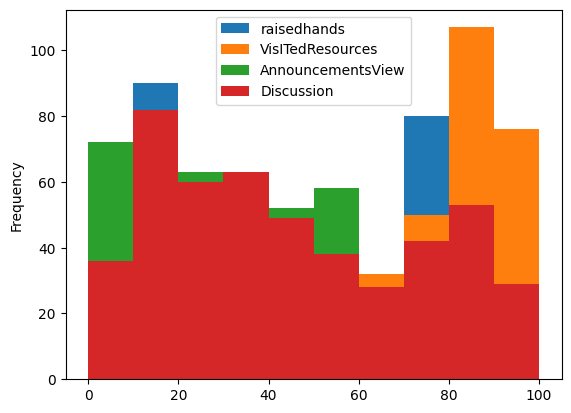

In [ ]:
data[numeric_cols].plot(kind='hist')

In [ ]:
threshold = 3
z_scores = data[numeric_cols].apply(zscore)
outliers = data[numeric_cols][z_scores.abs() > threshold]



---



###**Task - 3: Apply the Data Transformations**###

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
new_data = data[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]]

In [ ]:
df_scaled = scaler.fit_transform(new_data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"])

In [ ]:
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0.15,0.161616,0.020408,0.193878
1,0.20,0.202020,0.030612,0.244898
2,0.10,0.070707,0.000000,0.295918
3,0.30,0.252525,0.051020,0.346939
4,0.40,0.505051,0.122449,0.500000




---

